# 데이터셋 불러오기

In [ ]:
# from google.colab import files
# files.upload()

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d mathchi/diabetes-data-set
# !unzip diabetes-data-set.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
Archive:  diabetes-data-set.zip
  inflating: diabetes.csv            


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 기본 데이터셋 파악

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# 각 변수의 기초 통계량(평균, 분산 등)을 확인하여 전반적 분포를 파악함
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# 종속변수 'Outcome'의 클래스 불균형 여부 확인
print(df['Outcome'].value_counts())
count_1 = (df['Outcome'] == 1).sum()
print("값이 1인 개수:", count_1)

Outcome
0    500
1    268
Name: count, dtype: int64
값이 1인 개수: 268


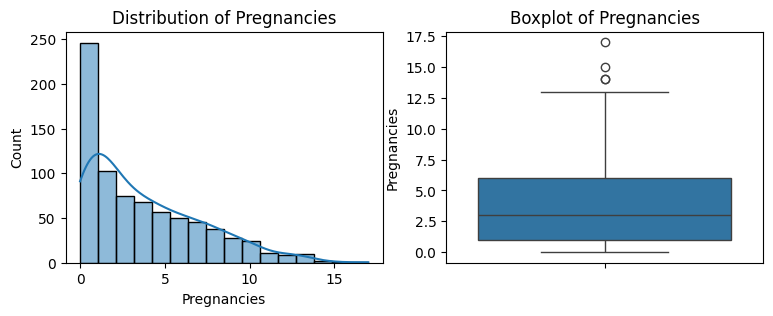

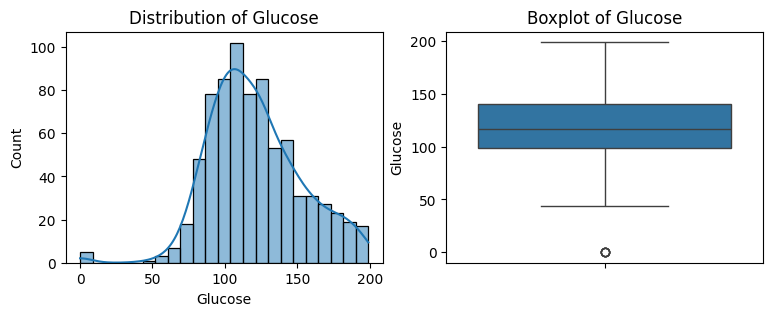

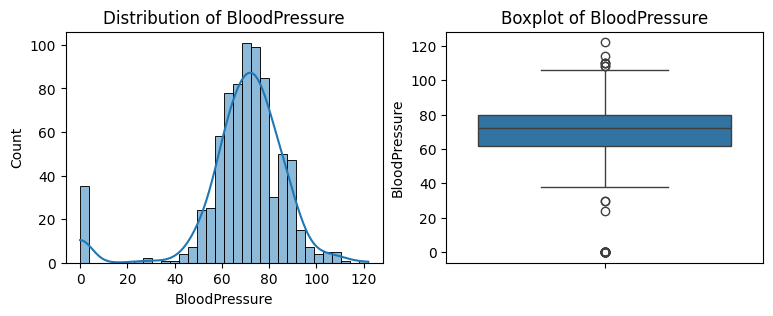

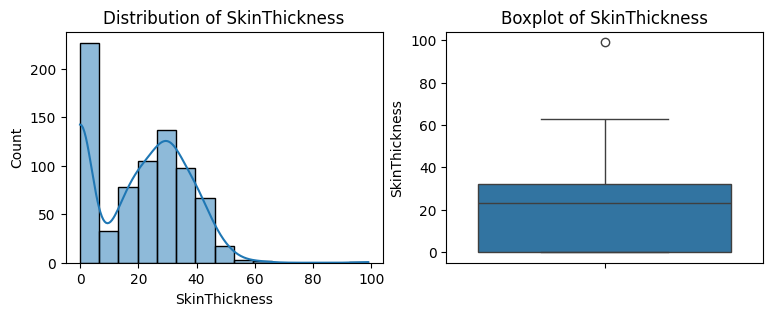

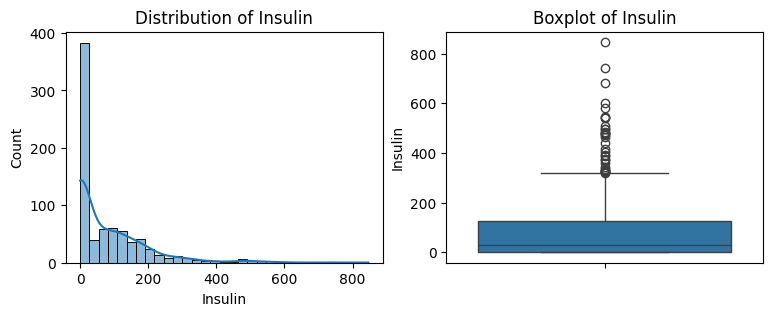

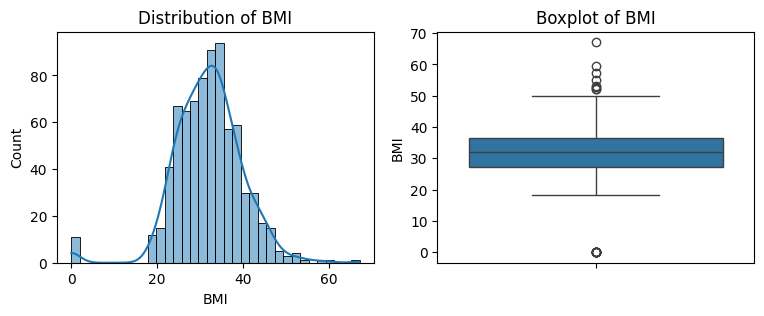

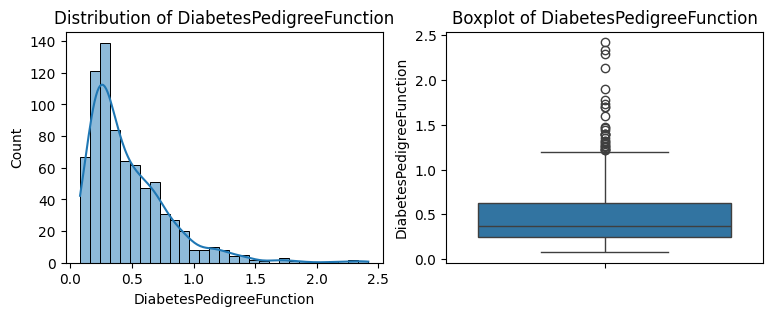

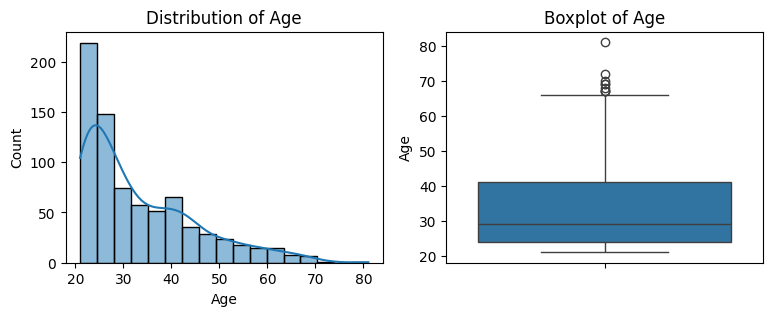

In [ ]:
# 각 변수별 데이터 분포 시각화
features = df.drop('Outcome',axis=1)

for feature in features:
  plt.figure(figsize=(9,3))
  plt.subplot(1,2,1)
  sns.histplot(df[feature],kde=True)
  plt.title(f'Distribution of {feature}')
  plt.subplot(1,2,2)
  sns.boxplot(df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

In [ ]:
# 생리적으로 불가능한 혈압값(0) 존재 여부 및 고혈압 환자 수 확인
count_2 = (df['BloodPressure'] == 0).sum()
print("값이 0인 개수:", count_2)
count_3 = (df['BloodPressure']>100).sum()
print("BloodPressure가 100 초과인 개수: ",count_3)

값이 0인 개수: 35
BloodPressure가 100 초과인 개수:  13


In [ ]:
# SkinThickness에서 0이거나 60초과인 값 확인(생리적으로 불가능)
mask1 = (df['SkinThickness'] == 0) | (df['SkinThickness'] > 60)
count_4 = mask1.sum()
print("값이 0이거나 60 초과인 것의 개수:", count_4)

값이 0이거나 60 초과인 것의 개수: 229


In [ ]:
# Insulin에서 0이거나 300 초과인 값 확인
mask2 = (df['Insulin'] == 0) | (df['Insulin'] >=300)
count_5 = mask2.sum()
print("값이 0이거나 300 이상인 개수:", count_5)

값이 0이거나 300 이상인 개수: 412


In [ ]:
# BMI에서 0이거나 50 초과인 값 확인
mask3 = (df['BMI'] == 0) | (df['BMI'] > 50)
count_6 = mask3.sum()
print("값이 0이거나 50 초과인 것의 개수:", count_6)

값이 0이거나 50 초과인 것의 개수: 19


In [ ]:
# 혈당 수치에서 0값 확인 (생리적으로 불가능)
count_7 = (df['Glucose']==0).sum()
print("값이 0인 개수:", count_7)

값이 0인 개수: 5


# 데이터셋 전처리 및 상관관계 시각화

In [56]:
# glucose 전처리(이상값 제거)
df = df.drop(df[df['Glucose'] == 0].index)

# bloodpressure 전처리(이상값 평균으로 대체)
mean_bp = df.loc[df['BloodPressure'] != 0, 'BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].replace(0, mean_bp)

# skinthickness 전처리(이상값 중앙값으로 대체)
valid_st = df.loc[(df['SkinThickness'] != 0) & (df['SkinThickness'] <= 60), 'SkinThickness']
median_st = valid_st.median()
df['SkinThickness'] = df['SkinThickness'].mask(
    (df['SkinThickness'] == 0) | (df['SkinThickness'] > 60),median_st)

# Insulin 전처리(이상값 중앙값으로 대체)
valid_insulin = df.loc[(df['Insulin']!=0) & (df['Insulin']<300), 'Insulin']
median_insulin = valid_insulin.median()
df['Insulin'] = df['Insulin'].mask(
    (df['Insulin']==0) | (df['Insulin']>=300),median_insulin)

# BMI 전처리(이상값 제거)
df = df.drop(df[(df['BMI']==0) | (df['BMI']>50)].index)

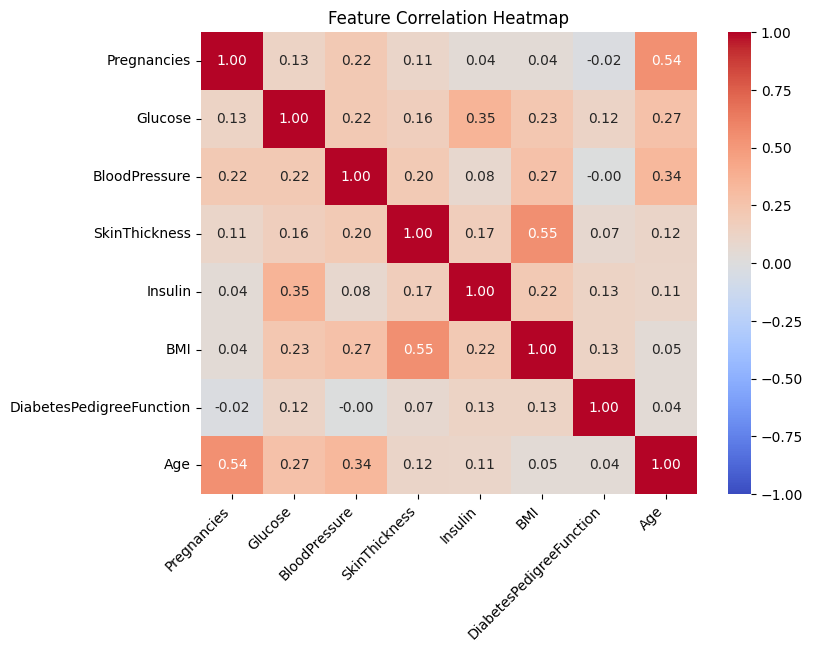

In [ ]:
# 독립변수 간 상관관계 시각화
feature_df = df.drop(columns=['Outcome'])
plt.figure(figsize=(8,6))
sns.heatmap(feature_df.corr(), annot=True, fmt=".2f", cmap='coolwarm',vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Feature Correlation Heatmap")
plt.show()

In [75]:
# 상관계수 유의성 검증
%pip install pingouin

import pingouin as pg

results = pg.pairwise_corr(
    data=feature_df,
    columns=feature_df.columns,
    method='pearson',
    alternative='two-sided',
    padjust='none')

print(results)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.1 MB/s eta 0:00:00
                           X                         Y   method alternative  \
0                Pregnancies                   Glucose  pearson   two-sided   
1                Pregnancies             BloodPressure  pearson   two-sided   
2                Pregnancies             SkinThickness  pearson   two-sided   
3                Pregnancies                   Insulin  pearson   two-sided   
4                Pregnancies                       BMI  pearson   two-sided   
5                Pregnancies  DiabetesPedigreeFunction  pearson   two-sided   
6                Pregnancies                       Age  pearson   two-sided   
7                    Glucose             BloodPressure  pearson   two-sided   
8                    Glucose             SkinThickness  pearson   two-sided   
9                    Glucose                   Insulin  pearson   two-sided   
10                   Glucose                       

# 특성 및 타겟 변수 분리와 훈련/ 검증 데이터셋 분할

In [57]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 및 로그변환

In [50]:
# 로그변환 필요한 변수 판단 위해 왜도 산출
skewness = X_train.apply(lambda col: col.skew())
print(skewness)

Pregnancies                 0.935022
Glucose                     0.113834
BloodPressure              -1.870006
SkinThickness              -0.037131
Insulin                     2.357532
BMI                        -0.215522
DiabetesPedigreeFunction    2.094005
Age                         1.181449
dtype: float64


In [58]:
# 로그 변환
feature_to_log_transform = ['Insulin','DiabetesPedigreeFunction','Age']

X_train[feature_to_log_transform] = np.log(X_train[feature_to_log_transform])
X_valid[feature_to_log_transform] = np.log(X_valid[feature_to_log_transform])

In [59]:
# 표준화
from sklearn.preprocessing import StandardScaler

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns, index=X_train.index)
X_valid = pd.DataFrame(
    scaler.transform(X_valid),
    columns=X_valid.columns, index=X_valid.index)


# 로지스틱 회귀 모델 구축 및 검증 데이터에 대한 성능 평가

In [63]:
# 회귀 모델 구축 전 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_train_vif = add_constant(X_train)

vif_df = pd.DataFrame()
vif_df['Variable'] = X_train_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]

print(vif_df)

                   Variable       VIF
0                     const  1.000000
1               Pregnancies  1.525172
2                   Glucose  1.281468
3             BloodPressure  1.224105
4             SkinThickness  1.483686
5                   Insulin  1.197339
6                       BMI  1.588321
7  DiabetesPedigreeFunction  1.034090
8                       Age  1.710944


In [65]:
# 로지스틱 회귀 모델 구축
from sklearn.linear_model import LogisticRegression

X_train = X_train.drop('const', axis=1)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

In [66]:
# 검증데이터 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy_diabetes_LR = accuracy_score(y_valid, y_pred)
precision_diabetes_LR = precision_score(y_valid, y_pred)
recall_diabetes_LR = recall_score(y_valid, y_pred)
f1_diabetes_LR = f1_score(y_valid, y_pred)

print("Accuracy:", accuracy_diabetes_LR)
print("Precision:", precision_diabetes_LR)
print("Recall:", recall_diabetes_LR)
print("F1 Score:", f1_diabetes_LR)

cf_mat = confusion_matrix(y_valid, y_pred)
display(cf_mat)


Accuracy: 0.8187919463087249
Precision: 0.6976744186046512
Recall: 0.6818181818181818
F1 Score: 0.6896551724137931


array([[92, 13],
       [14, 30]])

ROC AUC: 0.873


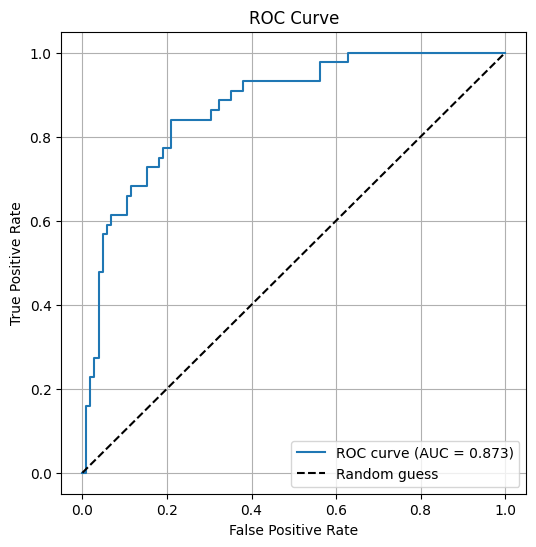

In [67]:
# 임계값 독립 지표 확인(ROC-AUC 커브 시각화)
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = model.predict_proba(X_valid)[:, 1]

roc_auc = roc_auc_score(y_valid, y_prob)
print(f"ROC AUC: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_valid, y_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# 랜덤 포레스트 모델 구축 및 검증 데이터에 대한 성능 평가

In [68]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)
RF_y_pred = RF_model.predict(X_valid)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy_diabetes_RF = accuracy_score(y_valid, RF_y_pred)
precision_diabetes_RF = precision_score(y_valid, RF_y_pred)
recall_diabetes_RF = recall_score(y_valid, RF_y_pred)
f1_diabetes_RF = f1_score(y_valid, RF_y_pred)

print("Accuracy:", accuracy_diabetes_RF)
print("Precision:", precision_diabetes_RF)
print("Recall:", recall_diabetes_RF)
print("F1 Score:", f1_diabetes_RF)

cf_mat_RF = confusion_matrix(y_valid, RF_y_pred)
display(cf_mat_RF)

Accuracy: 0.8053691275167785
Precision: 0.6595744680851063
Recall: 0.7045454545454546
F1 Score: 0.6813186813186813


array([[89, 16],
       [13, 31]])

ROC AUC: 0.861


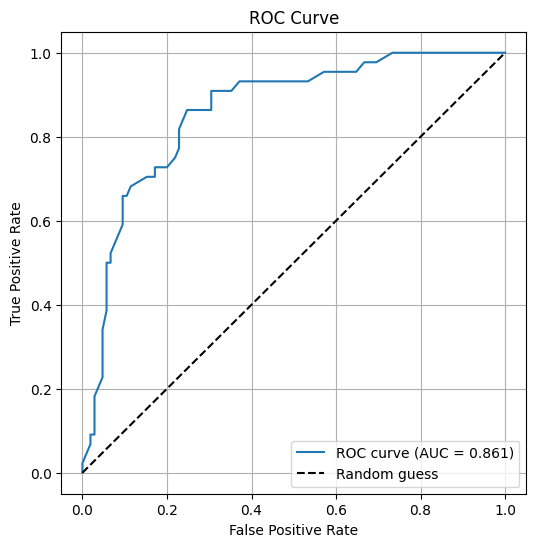

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob_RF = RF_model.predict_proba(X_valid)[:, 1]

roc_auc = roc_auc_score(y_valid, y_prob_RF)
print(f"ROC AUC: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_valid, y_prob_RF)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 각 모델이 중요하게 여긴 변수 파악

In [71]:
# 로지스틱 회귀 계수 확인
import pandas as pd

coefficients = model.coef_[0]
coef_df = pd.DataFrame({'Feature': X_train.columns,
    'Coefficient': coefficients})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df)

                    Feature  Coefficient  Abs_Coefficient
1                   Glucose     1.082046         1.082046
5                       BMI     0.553506         0.553506
0               Pregnancies     0.375229         0.375229
6  DiabetesPedigreeFunction     0.311521         0.311521
7                       Age     0.171470         0.171470
4                   Insulin     0.152516         0.152516
2             BloodPressure    -0.045607         0.045607
3             SkinThickness    -0.017521         0.017521


In [74]:
# 랜덤포레스트 변수 중요도
importances_df = pd.DataFrame({'Feature': X.columns,
    'RF_Importance': RF_model.feature_importances_
}).sort_values(by='RF_Importance', ascending=False)

print(importances_df)

                    Feature  RF_Importance
1                   Glucose       0.267192
5                       BMI       0.177595
6  DiabetesPedigreeFunction       0.126780
7                       Age       0.115452
2             BloodPressure       0.085429
0               Pregnancies       0.079007
4                   Insulin       0.078563
3             SkinThickness       0.069981
